In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import analyze as a
import matplotlib.pyplot as plt
import matplotlib.colors as mpcolors
import numpy as np
import paper_plots as pp
import sweep_analyze as sa

In [3]:
#gain_list, freq, fig, axs = a.polar_beam(gain_list=None, f=None, figsize=(5,3))
fig, axs = a.polar_beam(gain_list=gain_list, f=freq, figsize=(5,3))
#fig.savefig("april_plots/polar_beam.pdf", bbox_inches="tight")

NameError: name 'gain_list' is not defined

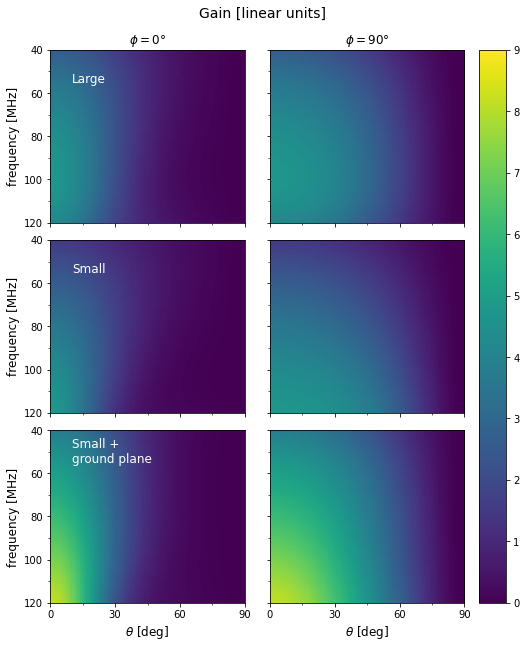

In [59]:
fig, axs = pp.beams(gain_list, freq, False, figsize=(5,3))
#fig.savefig("april_plots/beam_gain.pdf", bbox_inches="tight")

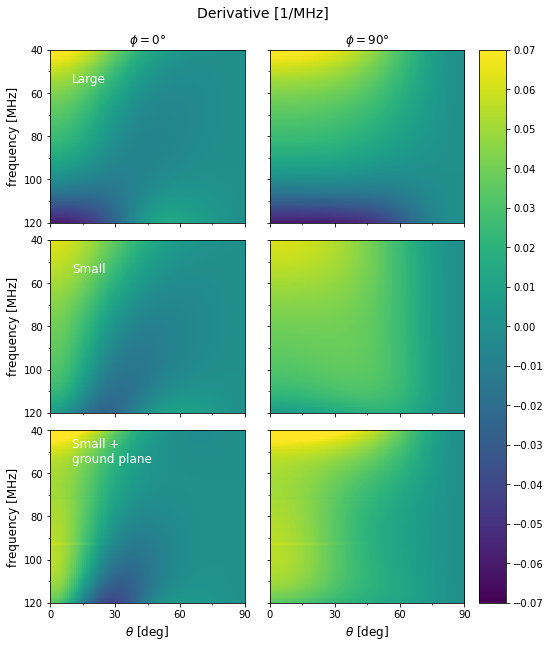

In [60]:
fig, axs = pp.beams(gain_list, freq, True, figsize=(5,3))
#fig.savefig("april_plots/beam_deriv.pdf", bbox_inches="tight")

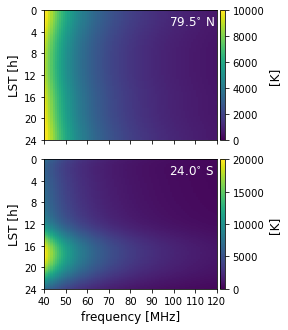

In [61]:
f, t, l = a.get_ftl(0, "sweep", "79.5", ground_plane=False, simulation="old_MIST",)
tsouth = a.get_ftl(0, 'sweep', '-24.0', ground_plane=False, simulation="old_MIST", return_fl=False)
fig, axs = a.plot_temp_3d(f, l, t, tsouth, figsize=(4,16/6))
#fig.savefig('april_plots/waterfall.pdf', bbox_inches='tight')

In [62]:
# largeep = []
# smallep = []
# miniep = []
# for az in [0, 90, 120]:
#     l = sa.rms_sweep(False, "old_MIST", azimuth=az, model="EDGES_polynomial")
#     largeep.append(l)
#     print(f"large {az}")
    
#     s = sa.rms_sweep(False, "new_MIST", azimuth=az, model="EDGES_polynomial")
#     smallep.append(s)
#     print(f"small {az}")
    
#     m = sa.rms_sweep(True, "mini_MIST", azimuth=az, model="EDGES_polynomial")
#     miniep.append(m)
#     print(f"mini {az}")
    
    
# rms_arr_list = largeep + smallep + miniep
# np.save("rms_lat_lst.npy", rms_arr_list)

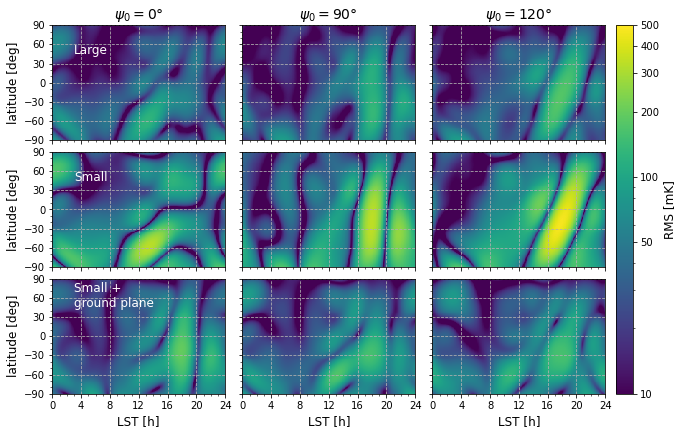

In [63]:
# rms_arr_list = np.load("april_plots/data/rms_lat_lst.npy")
fig, axs = sa.subplot(rms_arr_list, (3,2))
#fig.savefig("april_plots/rms_lat_lst.pdf", bbox_inches="tight")

In [64]:
# d_old_ll, lb_old_ll = sa.get_hist("old_MIST", "linlog")
# d_old_ep, lb_old_ep = sa.get_hist("old_MIST", "edges_polynomial")

# print("----")

# d_new_ll, lb_new_ll = sa.get_hist("new_MIST", "linlog")
# d_new_ep, lb_new_ep = sa.get_hist("new_MIST", "edges_polynomial")

# print("----")

# d_mini_ll, lb_mini_ll = sa.get_hist("mini_MIST", "linlog")
# d_mini_ep, lb_mini_ep = sa.get_hist("mini_MIST", "edges_polynomial")

# np.savez("april_plots/data/hist_data_lbins.npz", d_old_ll=d_old_ll, lb_old_ll=lb_old_ll, d_old_ep=d_old_ep,
#          lb_old_ep=lb_old_ep, d_new_ll=d_new_ll, lb_new_ll=lb_new_ll, d_new_ep=d_new_ep, lb_new_ep=lb_new_ep,
#          d_mini_ll=d_mini_ll, lb_mini_ll=lb_mini_ll, d_mini_ep=d_mini_ep, lb_mini_ep=lb_mini_ep)

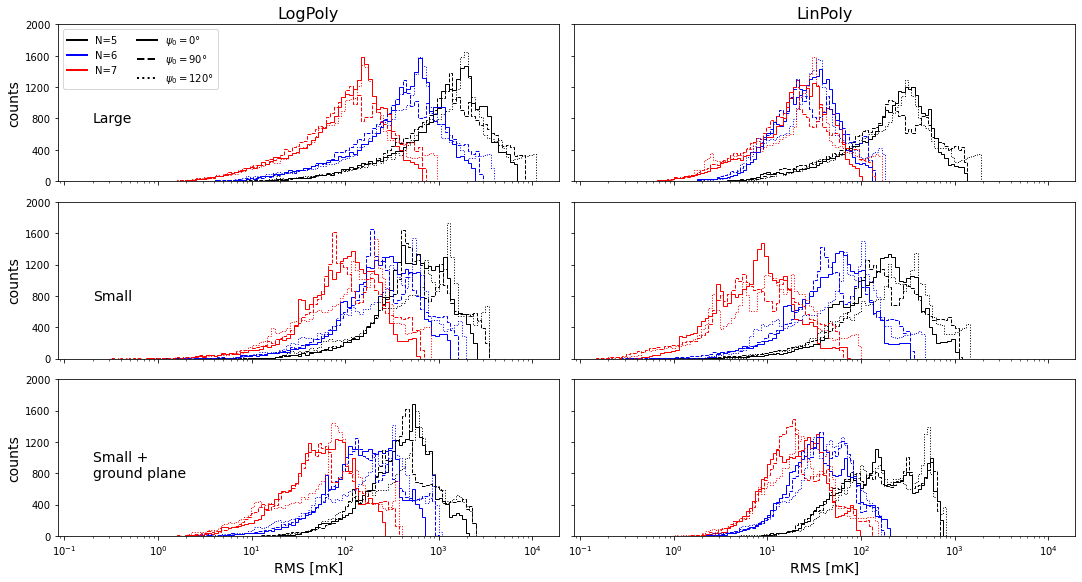

In [65]:
hist_data = np.load("april_plots/data/hist_data_lbins.npz")

fit_models = ["ll", "ep"]
ant_models = ["old", "new", "mini"]

fig, axs = sa.plot_hist()

for i, fm in enumerate(fit_models):
    for j, am in enumerate(ant_models):
        ax = axs[j, i]
        data = hist_data[f"d_{am}_{fm}"]
        lb = hist_data[f"lb_{am}_{fm}"]
        sa.add_hist(ax, data, lb)
        
axs[0,0].text(2e-1, 750, "Large", fontsize=14)
axs[1,0].text(2e-1, 750, "Small", fontsize=14)
axs[2,0].text(2e-1, 750, "Small +\nground plane", fontsize=14)

plt.setp(axs, yticks=np.linspace(0, 2000, num=6))

axs[0,0].set_title("LogPoly", fontsize=16)
axs[0,1].set_title("LinPoly", fontsize=16)
#plt.show()

plt.savefig("april_plots/hist.pdf", bbox_inches="tight")

In [ ]:
# fig, axs = pp.histogram(largell, largeep, smallll, smallep, gpll, gpep)
# fig.savefig('plots/paper_figs/histogram.pdf', bbox_inches='tight')

In [67]:
# rms_n = np.empty((3, 2, 3, 241))  # ant, model, az
# for i, az in enumerate([0, 90, 120]):
#     f, t, l = a.get_ftl(az, "sweep", "79.5", ground_plane=False, simulation="old_MIST")
#     rms,_ = a.compute_rms(f, t, model_type="EDGES_Polynomial")
#     rms_n[0, 1, i] = rms[0] * 1000
#     rms,_ = a.compute_rms(f, t, model_type="LINLOG")
#     rms_n[0, 0, i] = rms[0] * 1000
    
#     f, t, l = a.get_ftl(az, "sweep", "79.5", ground_plane=False, simulation="new_MIST")
#     rms,_ = a.compute_rms(f, t, model_type="EDGES_Polynomial")
#     rms_n[1, 1, i] = rms[0] * 1000
#     rms, _= a.compute_rms(f, t, model_type="LINLOG")
#     rms_n[1, 0, i] = rms[0] * 1000
    
#     f, t, l = a.get_ftl(az, "sweep", "79.5", ground_plane=True, simulation="mini_MIST")
#     rms,_ = a.compute_rms(f, t, model_type="EDGES_Polynomial")
#     rms_n[2, 1, i] = rms[0] * 1000
#     rms,_ = a.compute_rms(f, t, model_type="LINLOG")
#     rms_n[2, 0, i] = rms[0] * 1000
    
# np.save("april_plots/data/rms_lst_MARS.npy", rms_n)

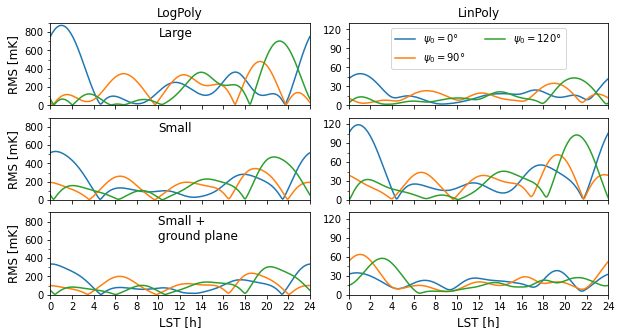

In [74]:
#rms_n = np.load("april_plots/data/rms_lst_MARS.npy")
fig, axs = pp.plot_rms(rms_n, (10,5))
#fig.savefig('april_plots/rms_mars.pdf', bbox_inches='tight')

In [75]:
# rms_s = np.empty((3, 2, 3, 241))  # ant, model, az
# for i, az in enumerate([0, 90, 120]):
#     f, t, l = a.get_ftl(az, "sweep", "-24.0", ground_plane=False, simulation="old_MIST")
#     rms,_ = a.compute_rms(f, t, model_type="EDGES_Polynomial")
#     rms_s[0, 1, i] = rms[0] * 1000
#     rms,_ = a.compute_rms(f, t, model_type="LINLOG")
#     rms_s[0, 0, i] = rms[0] * 1000
    
#     f, t, l = a.get_ftl(az, "sweep", "-24.0", ground_plane=False, simulation="new_MIST")
#     rms,_ = a.compute_rms(f, t, model_type="EDGES_Polynomial")
#     rms_s[1, 1, i] = rms[0] * 1000
#     rms, _= a.compute_rms(f, t, model_type="LINLOG")
#     rms_s[1, 0, i] = rms[0] * 1000
    
#     f, t, l = a.get_ftl(az, "sweep", "-24.0", ground_plane=True, simulation="mini_MIST")
#     rms,_ = a.compute_rms(f, t, model_type="EDGES_Polynomial")
#     rms_s[2, 1, i] = rms[0] * 1000
#     rms,_ = a.compute_rms(f, t, model_type="LINLOG")
#     rms_s[2, 0, i] = rms[0] * 1000
    
# np.save("april_plots/data/rms_lst_south.npy", rms_s)

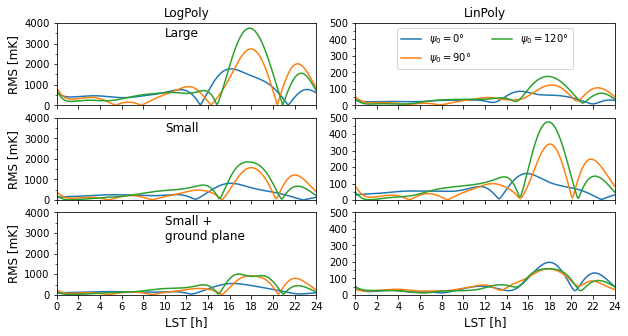

In [78]:
#rms_s = np.load("april_plots/data/rms_lst_south.npy")
fig, axs = pp.plot_rms(rms_s, (10,5), north=False)
#fig.savefig('april_plots/rms_south.pdf', bbox_inches='tight')

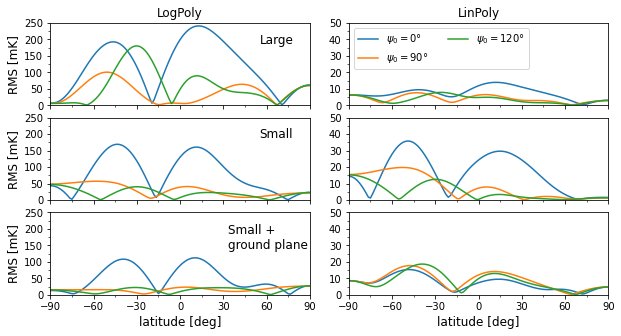

In [86]:
fig, axs = sa.rmsvslat()
#fig.savefig('april_plots/rms_vs_lat.pdf', bbox_inches='tight')

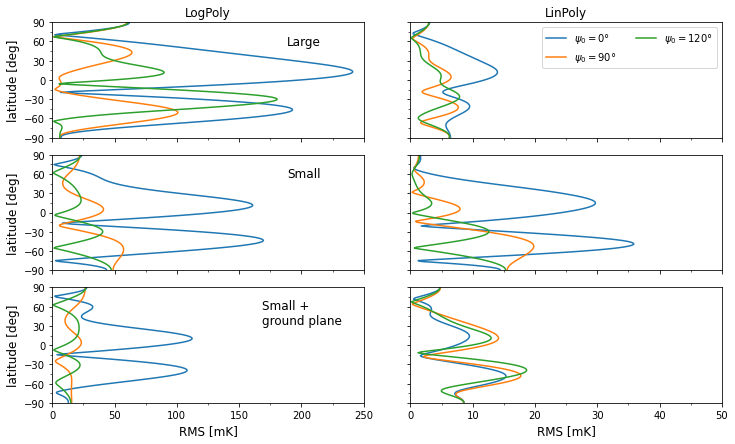

In [94]:
fig, axs = sa.rmsvslat_inv()
#fig.savefig('april_plots/rms_vs_lat_inv.pdf', bbox_inches='tight')

In [17]:
# LAT = 79.5
# ant_mod = ["old_MIST", "new_MIST", "mini_MIST"]
# azs = [0, 90, 120]
# bws = np.array([0, 10, 20, 30, 40, 60, 80, 120, 241])
# rms_arr_super_MARS = np.empty((len(ant_mod), len(azs), len(bws), 241))

# for i, am in enumerate(ant_mod):
#     gp = am == "mini_MIST"
#     for j, az in enumerate(azs):
#         f, t, _ = a.get_ftl(az, loc="sweep", sweep_lat=LAT, ground_plane=gp, simulation=am)
#         for k, bw in enumerate(bws):
#             if bw == 0:
#                 rms = a.compute_rms(f, t, flow=40, fhigh=120, model_type="edges_polynomial", Nfg_array=[6])[0]
#             else:
#                 rms = a.sliding_binLST(f, t, bw, model="edges_polynomial", Nfg=6)
#             rms_arr_super_MARS[i, j, k] = rms * 1000
            
# np.save("april_plots/data/lst_bins_mars.npy", rms_arr_super_MARS)

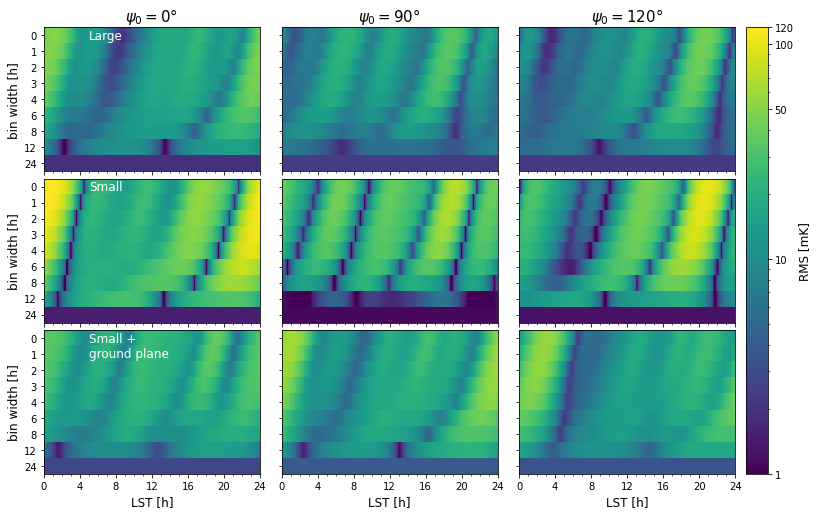

In [27]:
#rms_arr_super_MARS = np.load("april_plots/data/lst_bins_mars.npy")
fig, axs = a.subplot_LSTbins(rms_arr_super_MARS, 1, 120)
#fig.savefig("april_plots/lst_bins_mars.pdf", bbox_inches="tight")

In [28]:
LAT = -24.0
ant_mod = ["old_MIST", "new_MIST", "mini_MIST"]
azs = [0, 90, 120]
bws = np.array([0, 10, 20, 30, 40, 60, 80, 120, 241])
rms_arr_super_south = np.empty((len(ant_mod), len(azs), len(bws), 241))

for i, am in enumerate(ant_mod):
    gp = am == "mini_MIST"
    for j, az in enumerate(azs):
        f, t, _ = a.get_ftl(az, loc="sweep", sweep_lat=LAT, ground_plane=gp, simulation=am)
        for k, bw in enumerate(bws):
            if bw == 0:
                rms = a.compute_rms(f, t, flow=40, fhigh=120, model_type="edges_polynomial", Nfg_array=[6])[0]
            else:
                rms = a.sliding_binLST(f, t, bw, model="edges_polynomial", Nfg=6)
            rms_arr_super_south[i, j, k] = rms * 1000
            
np.save("april_plots/data/lst_bins_south.npy", rms_arr_super_south)

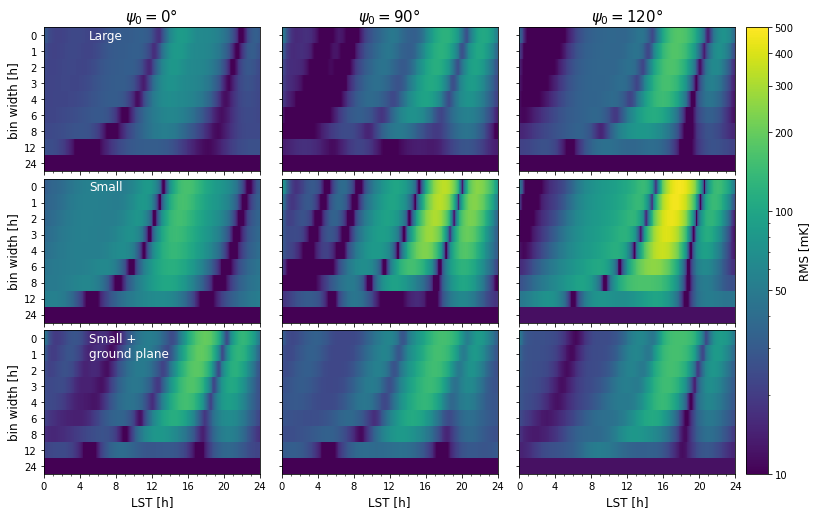

In [29]:
#rms_arr_super_south = np.load("april_plots/data/lst_bins_south.npy")
fig, axs = a.subplot_LSTbins(rms_arr_super_south, 10, 500)
#fig.savefig("april_plots/lst_bins_south.pdf", bbox_inches="tight")

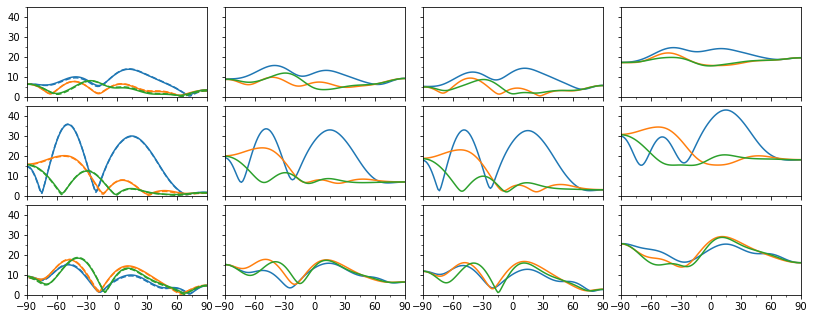

In [35]:
# rms_fg, rms_gauss, rms_edges = sa.rmsvslat_data()
# fig, axs = sa.rmsvslat_21cm(rms_fg, rms_gauss[0], rms_gauss[1], rms_gauss[2], rms_edges)

In [42]:
# fg_ref = np.empty((4, 3, 2))  # with no signal on top
# gauss_rms = np.empty((3, 3, 2, 201, 201))
# edges_rms = np.empty((1, 3, 2, 121, 201))
# for i, lat in enumerate([79.5, -24.0]):
#     for j, antenna in enumerate(["old_MIST", "new_MIST", "mini_MIST"]):
#         print(antenna)
#         gp = antenna == "mini_MIST"
#         f, t, _ = a.get_ftl(0, loc="sweep", sweep_lat=lat, ground_plane=gp, simulation=antenna)
#         t = t.mean(axis=0)
#         for k, gc in enumerate([40, 80, 120]):
#             print(gc)
#             gauss, ref = a.gaussian_rms(f, t, centre=gc)
#             gauss_rms[k, j, i] = gauss
#             fg_ref[k, j, i] = ref
#         edges, ref = a.EDGES_rms(f, t)
#         edges_rms[0, j, i] = edges
#         fg_ref[3, j, i] = ref
        
# assert np.allclose(fg_ref, np.repeat(fg_ref[0].reshape(-1, *fg_ref[0].shape), fg_ref.shape[0], axis=0))
# fg_ref = fg_ref[0]

# np.save("april_plots/data/gauss_ratios.npy", gauss_rms)
# np.save("april_plots/data/edges_ratios.npy", edges_rms)
# np.save("april_plots/data/fg_ref.npy", fg_ref)

old_MIST
40
80
120
new_MIST
40
80
120
mini_MIST
40
80
120
old_MIST
40
80
120
new_MIST
40
80
120
mini_MIST
40
80
120


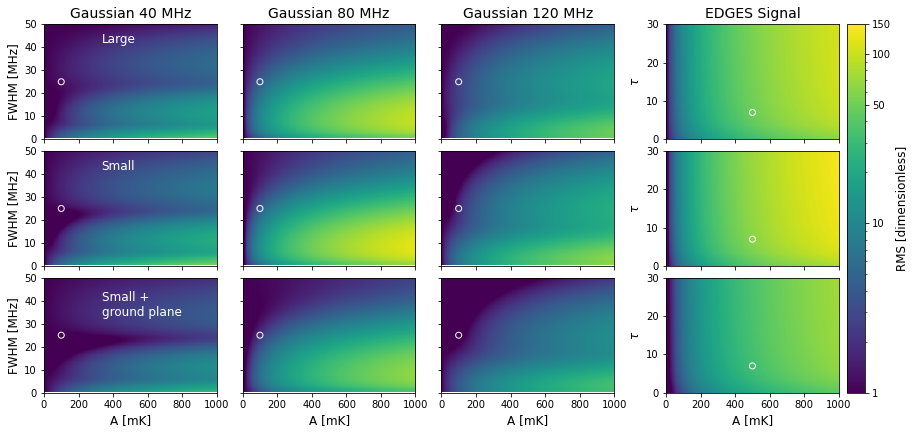

In [61]:
# gauss_rms = np.load("april_plots/data/gauss_ratios.npy")
# edges_rms = np.load("april_plots/data/edges_ratios.npy")
fig = a.plot_gauss_edges(gauss_rms[0], gauss_rms[1], gauss_rms[2], edges_rms[0])
#fig.savefig("april_plots/mock_signal_ratios_north0.pdf", bbox_inches="tight")

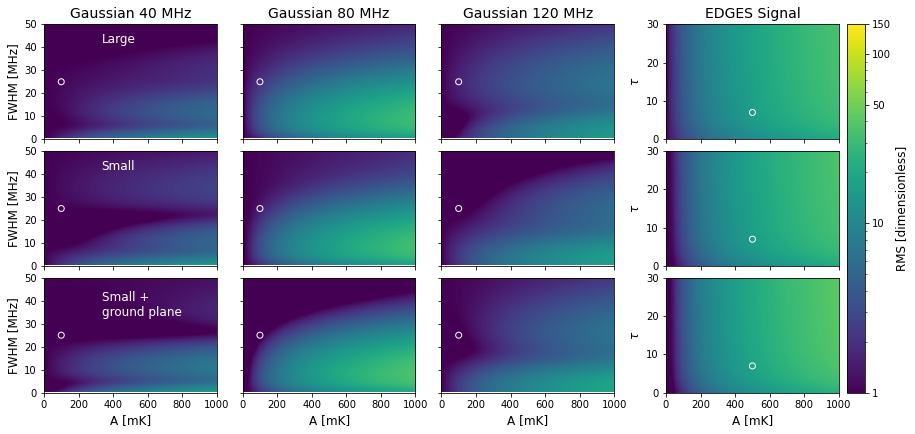

In [62]:
fig = a.plot_gauss_edges(gauss_rms[0], gauss_rms[1], gauss_rms[2], edges_rms[0], north=False)
#fig.savefig("april_plots/mock_signal_ratios_south0.pdf", bbox_inches="tight")